In [2]:
# Configuración del entorno de trabajo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/superstore_dataset2012.csv")

In [3]:
# Exploración y preparación de los datos
# Estructura general de los datos
df.info()

# Primeras 5 filas
df.head()

# Comprobar valores nulos
df.isnull().sum()

# Verificar tipos de datos
df.dtypes

# Convertir columnas de fecha a datetime (NaT)
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce') 
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Estadísticas generales
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4246 entries, 0 to 4245
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          4246 non-null   int64  
 1   Order ID        4246 non-null   object 
 2   Order Date      4246 non-null   object 
 3   Ship Date       4246 non-null   object 
 4   Ship Mode       4246 non-null   object 
 5   Customer ID     4246 non-null   object 
 6   Customer Name   4246 non-null   object 
 7   Segment         4246 non-null   object 
 8   City            4246 non-null   object 
 9   State           4246 non-null   object 
 10  Country         4246 non-null   object 
 11  Postal Code     823 non-null    float64
 12  Market          4246 non-null   object 
 13  Region          4246 non-null   object 
 14  Product ID      4246 non-null   object 
 15  Category        4246 non-null   object 
 16  Sub-Category    4246 non-null   object 
 17  Product Name    4246 non-null   o

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,4246.000000,4246,4246,2835,4246,4246,4246,4246,4246,4246,...,4246,4246,4246,4246,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246
unique,NaN,2127,NaN,NaN,4,999,739,3,1083,537,...,3347,3,17,2145,NaN,NaN,NaN,NaN,NaN,4
top,NaN,IN-2012-44194,NaN,NaN,Standard Class,GH-14425,Gary Hwang,Consumer,New York City,New York,...,OFF-AR-10000724,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,11,NaN,NaN,2668,21,22,2284,112,136,...,5,2604,484,16,NaN,NaN,NaN,NaN,NaN,2530
mean,25248.240226,NaN,2012-06-23 23:10:29.109750272,2012-08-19 04:00:45.714285824,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,237.029481,3.444183,0.146615,27.698282,24.539708,NaN
min,66.000000,NaN,2012-01-02 00:00:00,2012-01-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.112000,1.000000,0.000000,-1806.240000,0.030000,NaN
25%,12424.250000,NaN,2012-04-01 00:00:00,2012-07-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.564000,2.000000,0.000000,-0.062700,2.610000,NaN
50%,24848.000000,NaN,2012-06-12 00:00:00,2012-08-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,82.527900,3.000000,0.000000,9.029400,7.600000,NaN
75%,37522.750000,NaN,2012-10-02 00:00:00,2012-10-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,245.814750,5.000000,0.200000,35.902500,23.530000,NaN
max,51289.000000,NaN,2012-12-12 00:00:00,2012-12-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5759.964000,14.000000,0.800000,2229.024000,759.470000,NaN


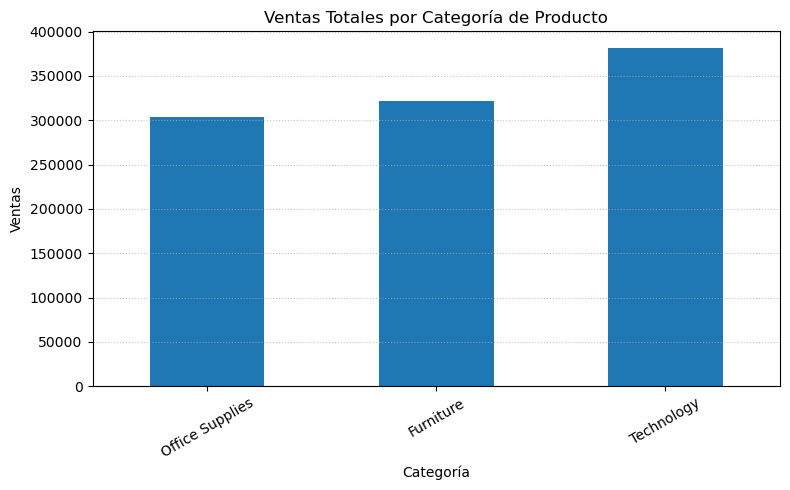

In [4]:
# Creación de visualizaciones univariantes con Matplotlib
ventas_por_categoria = df.groupby('Category')['Sales'].sum().sort_values(ascending=True)

# Creación del gráfico de barras
plt.figure(figsize=(8, 5))
ventas_por_categoria.plot(kind='bar')

# Personalización del gráfico
plt.title('Ventas Totales por Categoría de Producto')
plt.xlabel('Categoría')
plt.ylabel('Ventas')
plt.xticks(rotation=30)
plt.tight_layout()
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

plt.show()

In [5]:
# Creación de la frecuencia de una variable categórica (Segment)
segmentos = df['Segment'].value_counts()
print("Frecuencia de segmentos:\n", segmentos)

Frecuencia de segmentos:
 Segment
Consumer       2284
Corporate      1273
Home Office     689
Name: count, dtype: int64


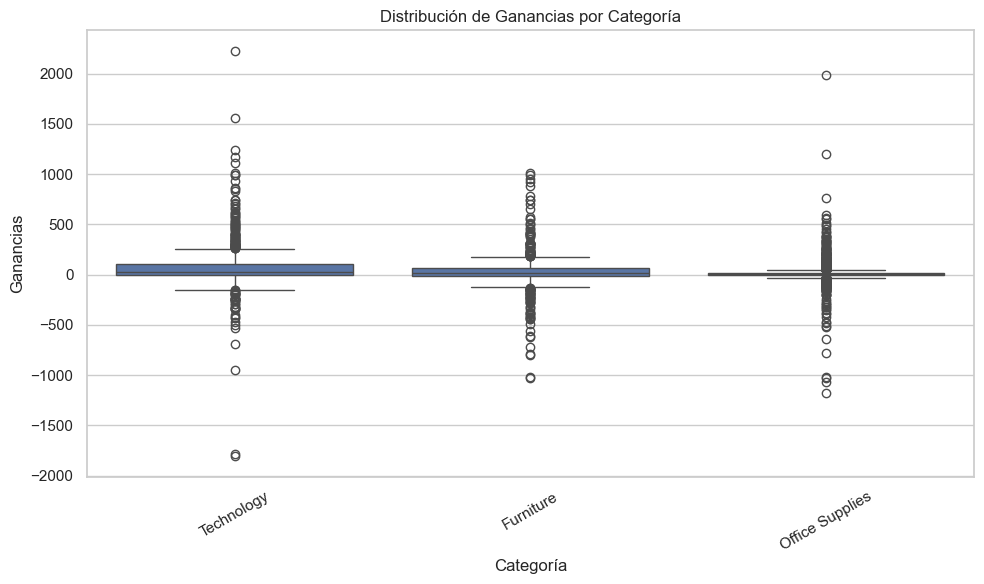

In [6]:
# Creación de visualizaciones univariantes con Seaborn
# Diagragama de caja (boxplot) para visualizar la distribución de una variable numérica, posiblemente agrupada por una variable categórica.

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x="Category", y="Profit", data=df)

plt.title("Distribución de Ganancias por Categoría")
plt.xlabel('Categoría')
plt.ylabel('Ganancias')
plt.xticks(rotation=30)
plt.tight_layout()

plt.show()

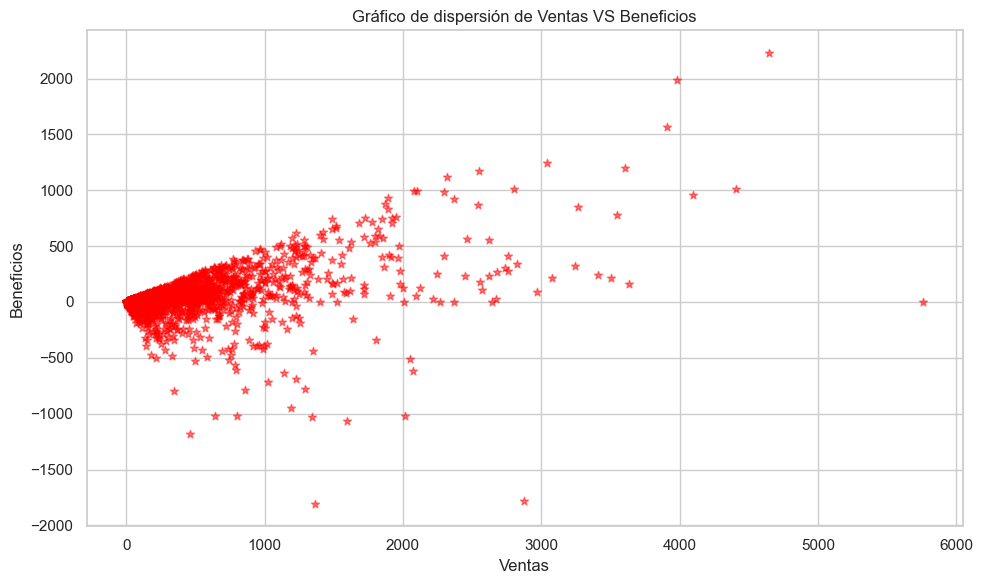

In [ ]:
# Implementación de gráficos bivariantes con Matplotlib
# Crea un gráfico de dispersión o de líneas con Matplotlib para mostrar la relación entre dos variables numéricas (por ejemplo, Ventas vs. Beneficios)

# Tamaño y gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df["Sales"], df["Profit"], alpha=0.5, color='red', marker='*')

# Etiquetas y título
plt.title("Gráfico de dispersión de Ventas VS Beneficios")
plt.xlabel("Ventas")
plt.ylabel("Beneficios")

# Mostrar gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


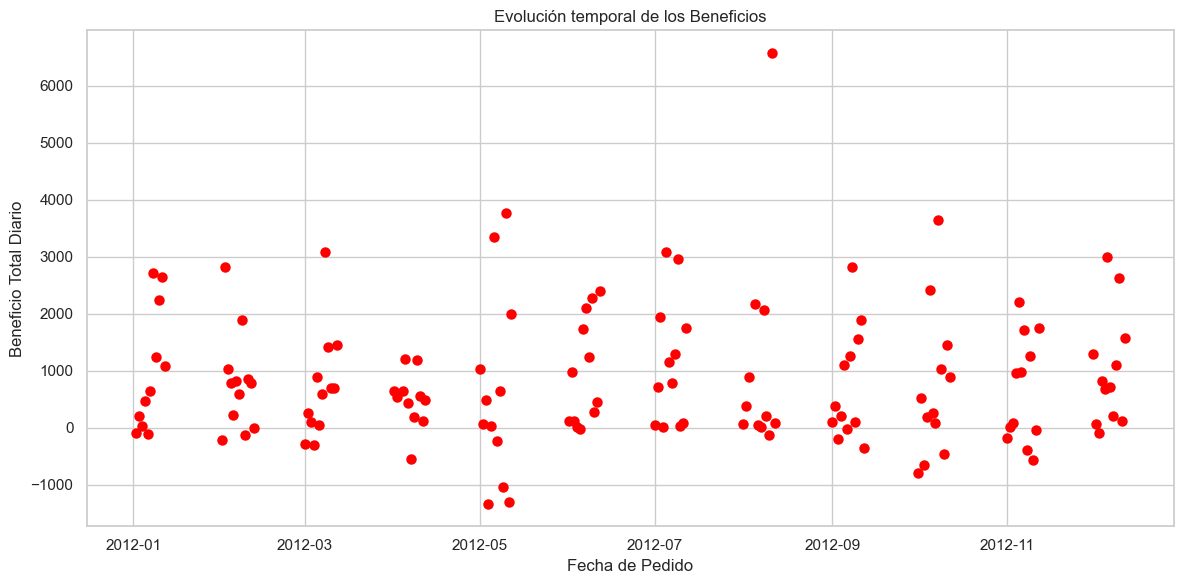

In [9]:
# Evolución temporal de las Ganancias (Profit)
# Agrupar por fecha y sumar beneficios
profit_over_time = df.groupby('Order Date')['Profit'].sum()

plt.figure(figsize=(12, 6))
plt.scatter(profit_over_time.index, profit_over_time.values, color='red', linewidths=1.5)

# Etiquetas y título
plt.title("Evolución temporal de los Beneficios")
plt.xlabel("Fecha de Pedido")
plt.ylabel("Beneficio Total Diario")

# Mostrar gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

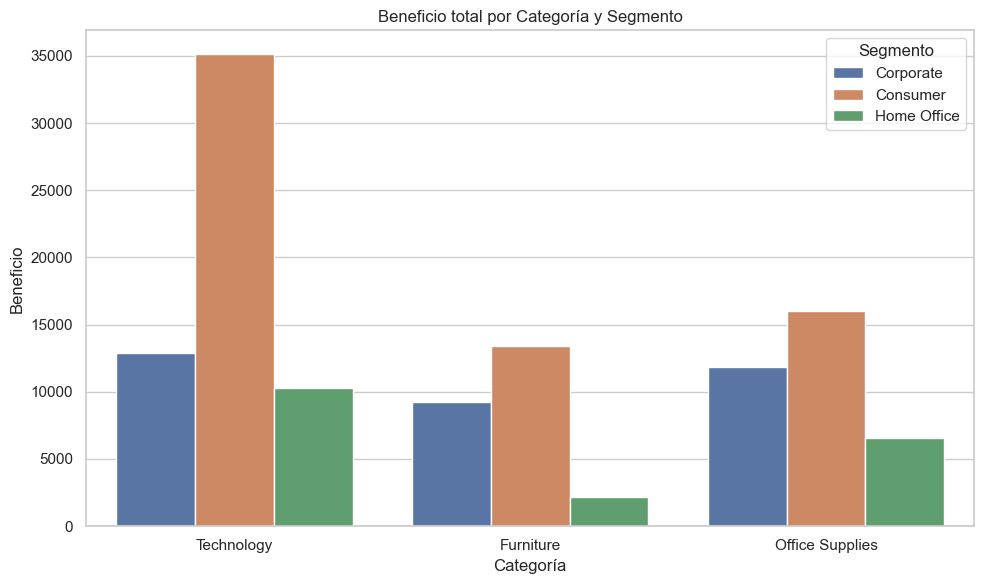

In [11]:
# Implementación de gráficos bivariantes con Seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Category", y="Profit", hue="Segment", estimator="sum", errorbar=None)

plt.title("Beneficio total por Categoría y Segmento")
plt.xlabel("Categoría")
plt.ylabel("Beneficio")
plt.legend(title="Segmento")
plt.tight_layout()

plt.show()

In [ ]:
# Creación de visualización multivariante con Seaborn
# Implementar un heatmap de correlación para visualizar relaciones múltiples de variables numéricas


# Implementar un pairplot para visualizar relaciones múltiples de variables numéricas